# OBS:

Válvula A: -1

Válvula B: +1

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
valvulas_df = pd.read_csv('valvulas.csv')
display(valvulas_df)

In [ ]:
valvulas_test_df = pd.read_csv('valvulasTestes.csv')
display(valvulas_test_df)

In [ ]:
valvulas_df.iloc[:, [0]].plot(kind='box')
valvulas_df.iloc[:, [1]].plot(kind='box')
valvulas_df.iloc[:, [2]].plot(kind='box')
valvulas_df.iloc[:, [3]].plot(kind='box')

In [24]:
v1=valvulas_df.iloc[:, [0]].values
v2=valvulas_df.iloc[:, [1]].values
v3=valvulas_df.iloc[:, [2]].values
v4=valvulas_df.iloc[:, [3]].values
vy=valvulas_df.iloc[:, [4]].values

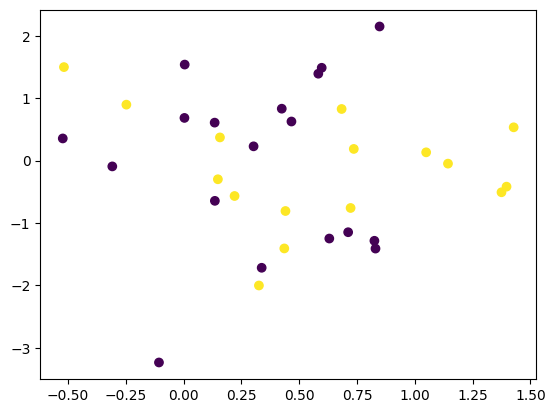

In [25]:
plt.scatter(v1, v2, c=vy)

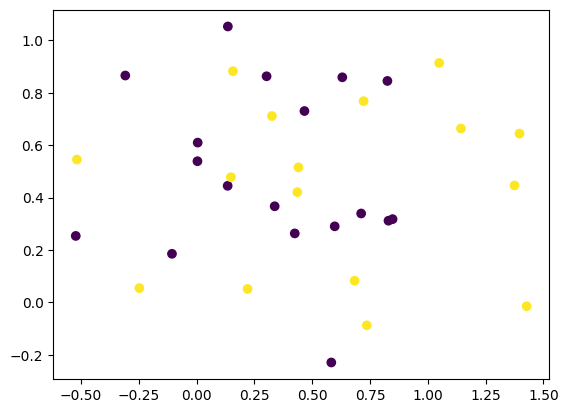

In [26]:
plt.scatter(v1, v3, c=vy)

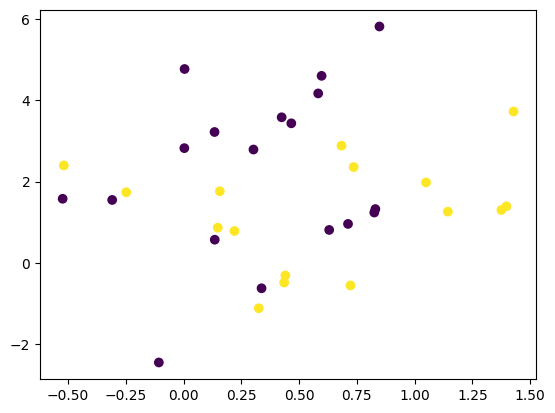

In [27]:
plt.scatter(v1, v4, c=vy)

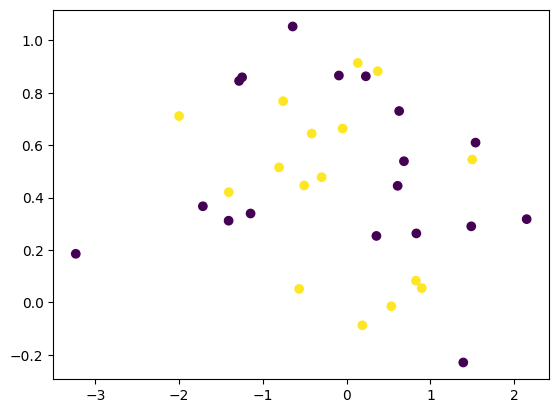

In [28]:
plt.scatter(v2, v3, c=vy)

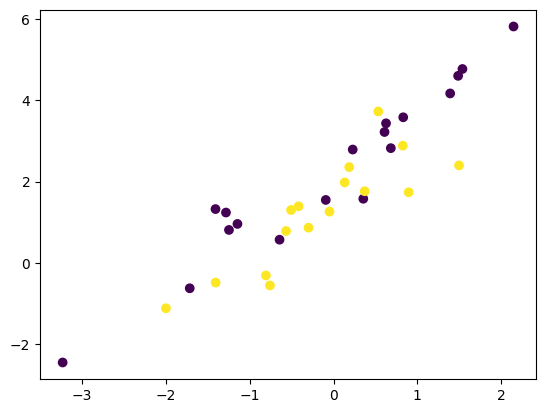

In [29]:
plt.scatter(v2, v4, c=vy)

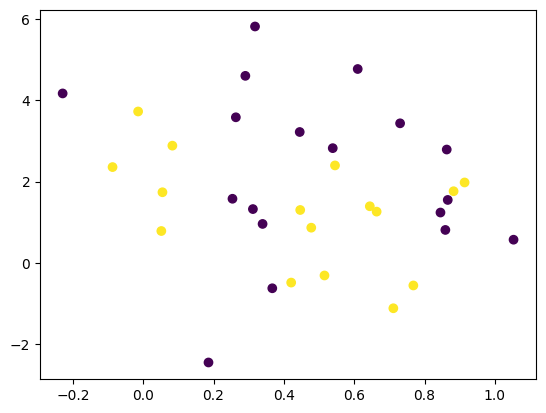

In [30]:
plt.scatter(v3, v4, c=vy)

In [ ]:
X_train=valvulas_df.iloc[:, [0,1,2,3]].values
y_train=valvulas_df.iloc[:, 4].values

X_test=valvulas_test_df.iloc[:, [0,1,2,3]].values
y_test=valvulas_test_df.iloc[:, 4].values

In [ ]:
# Testado com vários valores random_state. O valor 32 resulto em acurácia 1.0
p = Perceptron(random_state=42, eta0=0.001, alpha=0.00001, penalty='elasticnet', l1_ratio=0.05)
p.fit(X_train, y_train)

In [ ]:
train_predict = p.predict(X_train)
train_score = accuracy_score(train_predict, y_train)
print("Acurácia treinamento: ", train_score)

In [ ]:
test_predict = p.predict(X_test)
test_score = accuracy_score(test_predict, y_test)
print("Acurácia teste: ", test_score)

In [ ]:
conf_matrix = confusion_matrix(y_test, test_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['B','A'])
cm_display.plot()

In [ ]:
# Verificar mais resultados de acurácia para obter um valor de acurácia preciso
from sklearn.model_selection import cross_val_score

scores = cross_val_score(p, X_train, y_train, cv=8)
print("Acurácias em cada fold: ", scores)
print("Acurácia média:", scores.mean())